#Student Name: Pranav Mohan
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import necessary packages
import keras
import numpy as np
import tensorflow as tf; print(tf.__version__)

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM, InputLayer
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
import pickle



2.6.0


#Part 0: Importing and normalizing data

In [6]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 0s 0us/step


#Part 1: Plotting cross entropy

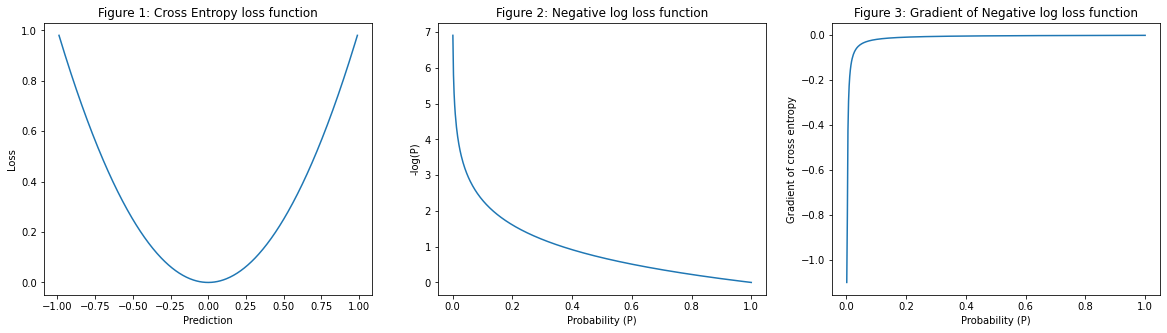

In [ ]:
#Show cross-entropy loss function
import tensorflow as tf
y_exp = np.linspace(-0.99, 0.99, 500); y_true = 0
loss_func = (y_exp-y_true)*(y_exp-y_true)
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(y_exp,loss_func); plt.title("Figure 1: Cross Entropy loss function"); plt.xlabel('Prediction'); plt.ylabel('Loss'); 
plt.subplot(132)
P = np.linspace(0.001,1, 500); 
plt.plot(P,-np.log(P)); plt.xlabel('Probability (P)'); plt.ylabel('-log(P)');  plt.title("Figure 2: Negative log loss function");
plt.subplot(133)
plt.plot(P,np.gradient(-np.log(P))); plt.xlabel('Probability (P)'); plt.ylabel('Gradient of cross entropy');  plt.title("Figure 3: Gradient of Negative log loss function");
# Citation: https://medium.com/@risingdeveloper/visualization-of-some-loss-functions-for-deep-learning-with-tensorflow-9f60be9d09f9

## Answers
Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: This question can be answered using the gradient of the negative log likelihood curve. When p is small, the loss value can be very high and the gradient magnitude is large making it non-consistent. This is not great for optimising. When the p value is large, the loss function gets closer to 0, thus reaching higher accuracy and this is desirable since this means that we are reaching the minimum solution. 

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: When minimizing the log-likehood function, we must take the gradient. When the probability is 0, the gradient is non-consistent as the gradient magnitude is large (figure 3 on top). For higher values of probability, the gradient remains consistent and does not saturate, thus making the optimization process easier. 




#Part 2: Overfit CNN

In [3]:
num_samples=5000; n=28; num_channels=1; num_classes=10;

In [ ]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Conv2D(256, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='softmax'))
    
    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

CNN_overfit_mdata =  CNN_overfit.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)
#CNN_overfit.save('saved_model/CNN_overfit') 
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(CNN_overfit_mdata.history) 
CNN_overfit_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_overfit_history.csv'
with open(CNN_overfit_file, mode='w') as f:
    hist_df.to_csv(f)

#Train the model and assign training meta-data to a variable
scores = CNN_overfit.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/200
59/59 [==============================] - 13s 207ms/step - loss: 0.9540 - accuracy: 0.6505 - val_loss: 0.4971 - val_accuracy: 0.8080
Epoch 2/200
59/59 [==============================] - 12s 204ms/step - loss: 0.4147 - accuracy: 0.8453 - val_loss: 0.3978 - val_accuracy: 0.8564
Epoch 3/200
59/59 [==============================] - 12s 204ms/step - loss: 0.3421 - accuracy: 0.8752 - val_loss: 0.3420 - val_accuracy: 0.8747
Epoch 4/200
59/59 [==============================] - 12s 203ms/step - loss: 0.3029 - accuracy: 0.8872 - val_loss: 0.3208 - val_accuracy: 0.8837
Epoch 5/200
59/59 [==============================] - 12s 203ms/step - loss: 0.2761 - accuracy: 0.8967 - val_loss: 0.3083 - val_accuracy: 0.8893
Epoch 6/200
59/59 [==============================] - 12s 204ms/step - loss: 0.2587 - accuracy: 0.9042 - val_loss: 0.2885 - val_accuracy: 0.8957
Epoch 7/200
59/59 [==============================] - 12s 203ms/step - loss: 0.2410 - accuracy: 0.9110 - val_loss: 0.2830 - val_accuracy:

In [3]:
def plotting(history,title):
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.plot(history.accuracy)
  plt.plot(history.val_accuracy)
  plt.title('CNN Accuracy vs Epoch'); plt.ylabel('Accuracy'); plt.xlabel('Epoch')
  plt.legend(['train','test']); 
  plt.subplot(122);
  plt.plot(history.loss)
  plt.plot(history.val_loss)
  plt.title('CNN Loss vs Epoch'); plt.ylabel('Loss'); plt.xlabel('Epoch')
  plt.legend(['train','test']); plt.suptitle(title); plt.show();

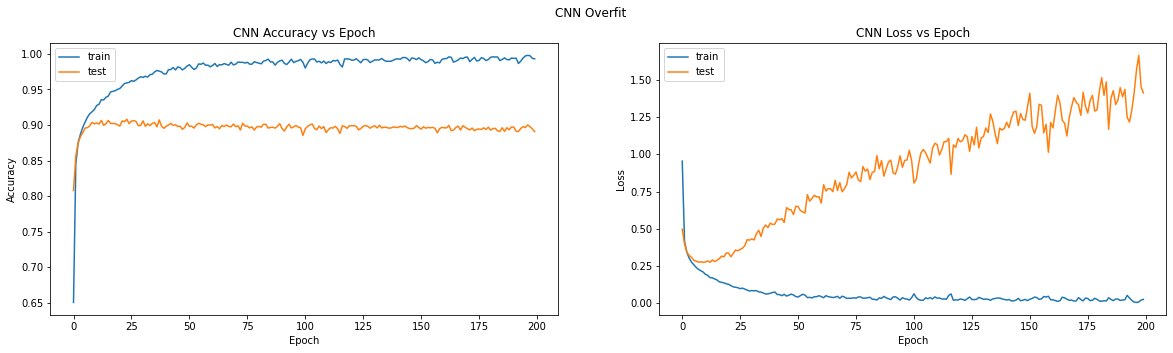

In [9]:
#Plot accuracy vs epoch
CNN_overfit_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_overfit_history.csv'
history=pd.read_csv(CNN_overfit_file); 
plotting(history,'CNN Overfit')

## Answers

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.026

2.   What does the loss of the testing set go to? 

  ANS: 1.41
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The weight and bias parameters that we have set in our model are highly accurate for the training dataset (low training loss), however, they are inaccurate for testing dataset, which means they is overfitting. 

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The training accuracy is high because the model has learnt the tratining dataset really well, which is why it is able to predit the different letters in the dataset accurately. However, when the testing dataset is shown to the model, it regularly fails to identify correctly 10% of the times. 

#Part 3: Dropout on input layer

In [ ]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

#FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(Conv2D(256, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_in_mdata =  CNN_dropout_in.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)

#CNN_dropout_in.save('saved_model/CNN_dropout_in') 
hist_df = pd.DataFrame(CNN_dropout_in_mdata.history) 
CNN_dropout_in_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_in_history.csv'
with open(CNN_dropout_in_file, mode='w') as f:
    hist_df.to_csv(f)
#Print accuracy of model on testing set after training 
scores_dropout_in = CNN_dropout_in.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_in[1]*100))

Epoch 1/200
59/59 [==============================] - 12s 201ms/step - loss: 1.1021 - accuracy: 0.5961 - val_loss: 0.6486 - val_accuracy: 0.7205
Epoch 2/200
59/59 [==============================] - 12s 196ms/step - loss: 0.4974 - accuracy: 0.8081 - val_loss: 0.4949 - val_accuracy: 0.8127
Epoch 3/200
59/59 [==============================] - 12s 196ms/step - loss: 0.4273 - accuracy: 0.8392 - val_loss: 0.4842 - val_accuracy: 0.8118
Epoch 4/200
59/59 [==============================] - 12s 197ms/step - loss: 0.3875 - accuracy: 0.8540 - val_loss: 0.4581 - val_accuracy: 0.8282
Epoch 5/200
59/59 [==============================] - 12s 197ms/step - loss: 0.3666 - accuracy: 0.8611 - val_loss: 0.4154 - val_accuracy: 0.8423
Epoch 6/200
59/59 [==============================] - 12s 198ms/step - loss: 0.3542 - accuracy: 0.8640 - val_loss: 0.3979 - val_accuracy: 0.8543
Epoch 7/200
59/59 [==============================] - 12s 197ms/step - loss: 0.3416 - accuracy: 0.8713 - val_loss: 0.3761 - val_accuracy:

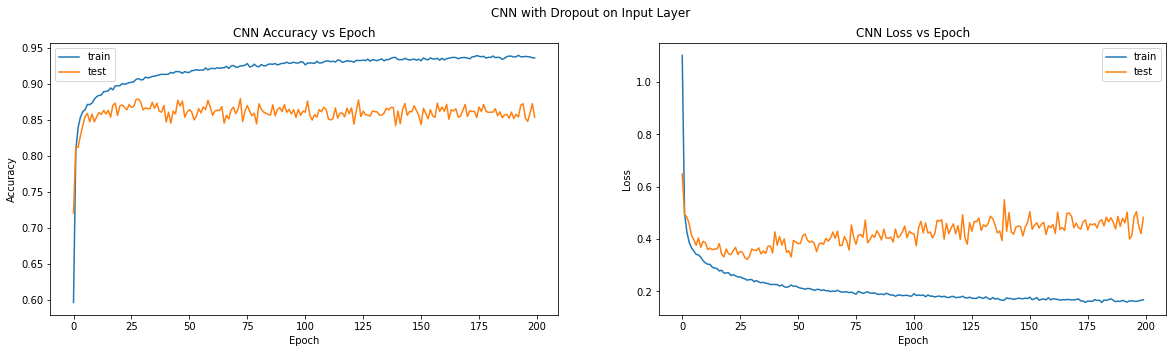

In [11]:
#Plot accuracy vs epoch
CNN_dropout_in_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_in_history.csv'
history=pd.read_csv(CNN_dropout_in_file); 
plotting(history,'CNN with Dropout on Input Layer')

## Answers

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.17
  
2.   What does the loss of the testing set go to? 

  ANS: 0.48

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: With the dropout, we add generalisation to the dataset, however, the dropout (regulariser) is not applied at the correct place. When the dropout is applied at the input, the model will not learn some crucial features of the images, which is why the loss is higher for testing dataset 

#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Conv2D(256, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3), 
                     activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, 
                           padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='softmax'))      
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_mdata =  CNN_dropout_hidden.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)
#CNN_dropout_hidden.save('saved_model/CNN_dropout_hidden') 
hist_df = pd.DataFrame(CNN_dropout_hidden_mdata.history) 
CNN_dropout_hidden_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_history.csv'
with open(CNN_dropout_hidden_file, mode='w') as f:
    hist_df.to_csv(f)

#Print accuracy of model on testing set after training 
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Epoch 1/200
59/59 [==============================] - 52s 316ms/step - loss: 1.2509 - accuracy: 0.5768 - val_loss: 0.6956 - val_accuracy: 0.7723
Epoch 2/200
59/59 [==============================] - 16s 273ms/step - loss: 0.5129 - accuracy: 0.8037 - val_loss: 0.5603 - val_accuracy: 0.8222
Epoch 3/200
59/59 [==============================] - 16s 273ms/step - loss: 0.4318 - accuracy: 0.8395 - val_loss: 0.5228 - val_accuracy: 0.8274
Epoch 4/200
59/59 [==============================] - 16s 273ms/step - loss: 0.3799 - accuracy: 0.8595 - val_loss: 0.4322 - val_accuracy: 0.8625
Epoch 5/200
59/59 [==============================] - 16s 273ms/step - loss: 0.3676 - accuracy: 0.8617 - val_loss: 0.4330 - val_accuracy: 0.8638
Epoch 6/200
59/59 [==============================] - 16s 272ms/step - loss: 0.3496 - accuracy: 0.8706 - val_loss: 0.4046 - val_accuracy: 0.8671
Epoch 7/200
59/59 [==============================] - 16s 273ms/step - loss: 0.3307 - accuracy: 0.8771 - val_loss: 0.4066 - val_accuracy:

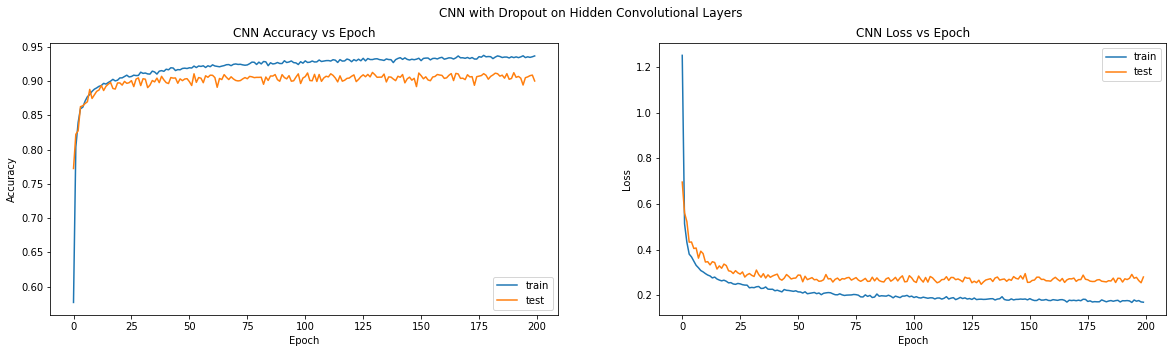

In [10]:
#Plot accuracy vs epoch
CNN_dropout_hidden_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_history.csv'
history=pd.read_csv(CNN_dropout_hidden_file); 
plotting(history,'CNN with Dropout on Hidden Convolutional Layers')

## Answers
Answer the following questions:


1.   What does the loss of the training set go to? 

  ANS: 0.17
  
2.   What does the loss of the testing set go to? 

  ANS: 0.28

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: By adding dropouts on the convolutional layers, some neurons during each epoch are not trained, which prevents overfitting. It was more effective here than in part 3 because in part 3, some parts of the input images were not learned due to dropout, however, here the original images are present for the model to learn from and using dropout. 
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The training dataset accuracy is 94% and the testing dataset accuracy is 90% with a difference of 4%. Best models would have the same accuracy for both testing and training datasets. This probably means that our model is still overfitting and may be increating the dropout rate will increase regularisation bring the testing and training accuracy percentages to similar value. 

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='softmax'))      
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_mdata =  CNN_dropout_both.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)
#CNN_dropout_in.save('saved_model/CNN_dropout_both') 
hist_df = pd.DataFrame(CNN_dropout_both_mdata.history) 
CNN_dropout_both_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_both_history.csv'
with open(CNN_dropout_both_file, mode='w') as f:
    hist_df.to_csv(f)
#Print accuracy of model on testing set after training 
scores_dropout_both = CNN_dropout_both.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_both[1]*100))

Epoch 1/200
59/59 [==============================] - 17s 280ms/step - loss: 1.2291 - accuracy: 0.5690 - val_loss: 0.7194 - val_accuracy: 0.7488
Epoch 2/200
59/59 [==============================] - 16s 273ms/step - loss: 0.5398 - accuracy: 0.7891 - val_loss: 0.6130 - val_accuracy: 0.8076
Epoch 3/200
59/59 [==============================] - 16s 273ms/step - loss: 0.4727 - accuracy: 0.8193 - val_loss: 0.5860 - val_accuracy: 0.7935
Epoch 4/200
59/59 [==============================] - 16s 273ms/step - loss: 0.4365 - accuracy: 0.8345 - val_loss: 0.5219 - val_accuracy: 0.8242
Epoch 5/200
59/59 [==============================] - 16s 273ms/step - loss: 0.4114 - accuracy: 0.8440 - val_loss: 0.5093 - val_accuracy: 0.8198
Epoch 6/200
59/59 [==============================] - 16s 273ms/step - loss: 0.4003 - accuracy: 0.8488 - val_loss: 0.4820 - val_accuracy: 0.8316
Epoch 7/200
59/59 [==============================] - 16s 274ms/step - loss: 0.3887 - accuracy: 0.8533 - val_loss: 0.5061 - val_accuracy:

In [ ]:
#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_both[1]*100))

Accuracy: 81.83%


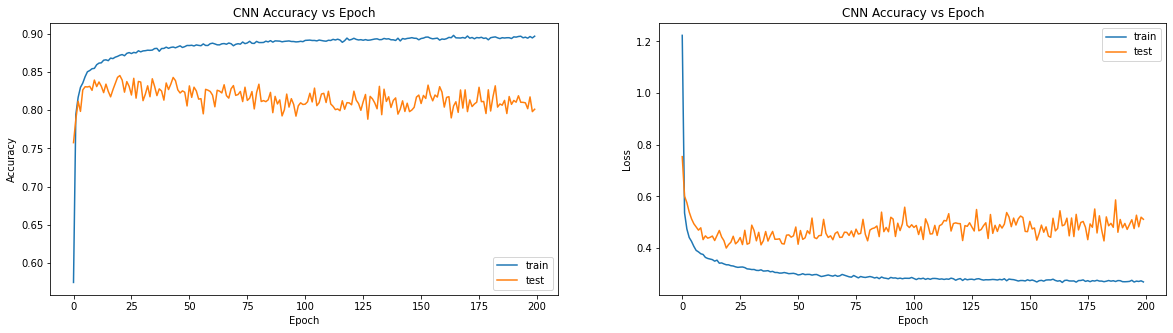

In [ ]:
#Plot accuracy vs epoch
CNN_dropout_both_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_both_history.csv'
history=pd.read_csv(CNN_dropout_both_file); 
plotting(history,'CNN with Dropout on Input and Hidden Layers')

## Answers
Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 0.27
  
2.   What does the loss of the testing set go to? 

  ANS: 0.42
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: The training accuracy is 89.7% and the testing accuracy is 83.5% with a different of 6.2%.

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: This model is worse than part 4 for these reasons: 
  - `Higher loss` - This is because the dropout is applied on input layer and important information from the input images is lost and the model is unable to learn that
  - `Lower accuracy` - This is also because of losing important information from the input images due to the dropout
  - `Overfitting` - The accuracy difference between testing and training data is higher which means there more overfitting than before
  So, this is model would not be considered more robust nor accurate.



#Part 5 : Activation Functions

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden_out_sig():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='sigmoid'))          
    return model
CNN_dropout_hidden_out_sig = CNN_dropout_hidden_out_sig()
CNN_dropout_hidden_out_sig.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
CNN_dropout_hidden_out_sig_mdata =  CNN_dropout_hidden_out_sig.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)
hist_df = pd.DataFrame(CNN_dropout_hidden_out_sig_mdata.history) 
CNN_dropout_hidden_out_sig_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_out_sig_history.csv'
with open(CNN_dropout_hidden_out_sig_file, mode='w') as f:
    hist_df.to_csv(f)
    
def CNN_dropout_hidden_out_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='tanh'))          
    return model

#Create instance of CNN model graph
CNN_dropout_hidden_out_tanh = CNN_dropout_hidden_out_tanh()

CNN_dropout_hidden_out_tanh.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])




CNN_dropout_hidden_out_tanh_mdata =  CNN_dropout_hidden_out_tanh.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)

hist_df = pd.DataFrame(CNN_dropout_hidden_out_tanh_mdata.history) 
CNN_dropout_hidden_out_tanh_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_out_tanh_history.csv'
with open(CNN_dropout_hidden_out_tanh_file, mode='w') as f:
    hist_df.to_csv(f)

#Print accuracy of model on testing set after training 
scores_dropout_hidden_out_sig   = CNN_dropout_hidden_out_sig.evaluate(data_train, labels_train)
scores_dropout_hidden_out_tanh = CNN_dropout_hidden_out_tanh.evaluate(data_train, labels_train)


#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_hidden_out_sig[1]*100))
print("Accuracy: %.2f%%" %(scores_dropout_hidden_out_tanh[1]*100))

Epoch 1/200
59/59 [==============================] - 17s 280ms/step - loss: 1.0528 - accuracy: 0.6377 - val_loss: 0.6123 - val_accuracy: 0.7953
Epoch 2/200
59/59 [==============================] - 16s 275ms/step - loss: 0.4375 - accuracy: 0.8364 - val_loss: 0.4490 - val_accuracy: 0.8498
Epoch 3/200
59/59 [==============================] - 16s 275ms/step - loss: 0.3652 - accuracy: 0.8669 - val_loss: 0.4417 - val_accuracy: 0.8579
Epoch 4/200
59/59 [==============================] - 16s 275ms/step - loss: 0.3350 - accuracy: 0.8760 - val_loss: 0.4089 - val_accuracy: 0.8634
Epoch 5/200
59/59 [==============================] - 16s 275ms/step - loss: 0.3133 - accuracy: 0.8825 - val_loss: 0.3825 - val_accuracy: 0.8694
Epoch 6/200
59/59 [==============================] - 16s 274ms/step - loss: 0.3003 - accuracy: 0.8887 - val_loss: 0.3629 - val_accuracy: 0.8687
Epoch 7/200
59/59 [==============================] - 16s 275ms/step - loss: 0.2907 - accuracy: 0.8914 - val_loss: 0.3326 - val_accuracy:

In [14]:
#Create and train model architecture
def CNN_dropout_hidden_out_tanh_mse():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None,padding='Valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='tanh'))          
    return model

#Create instance of CNN model graph
CNN_dropout_hidden_out_tanh_mse = CNN_dropout_hidden_out_tanh_mse()

CNN_dropout_hidden_out_tanh_mse.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])




CNN_dropout_hidden_out_tanh_mse_mdata =  CNN_dropout_hidden_out_tanh_mse.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)

hist_df = pd.DataFrame(CNN_dropout_hidden_out_tanh_mse_mdata.history) 
CNN_dropout_hidden_out_tanh_mse_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_out_tanh_mse_history.csv'
with open(CNN_dropout_hidden_out_tanh_mse_file, mode='w') as f:
    hist_df.to_csv(f)

Epoch 1/200
59/59 [==============================] - 20s 302ms/step - loss: 0.0848 - accuracy: 0.5692 - val_loss: 0.0390 - val_accuracy: 0.7675
Epoch 2/200
59/59 [==============================] - 16s 272ms/step - loss: 0.0298 - accuracy: 0.7950 - val_loss: 0.0325 - val_accuracy: 0.8154
Epoch 3/200
59/59 [==============================] - 16s 272ms/step - loss: 0.0255 - accuracy: 0.8272 - val_loss: 0.0292 - val_accuracy: 0.8331
Epoch 4/200
59/59 [==============================] - 16s 272ms/step - loss: 0.0239 - accuracy: 0.8379 - val_loss: 0.0292 - val_accuracy: 0.8251
Epoch 5/200
59/59 [==============================] - 16s 272ms/step - loss: 0.0221 - accuracy: 0.8511 - val_loss: 0.0249 - val_accuracy: 0.8538
Epoch 6/200
59/59 [==============================] - 16s 272ms/step - loss: 0.0214 - accuracy: 0.8560 - val_loss: 0.0242 - val_accuracy: 0.8576
Epoch 7/200
59/59 [==============================] - 16s 272ms/step - loss: 0.0209 - accuracy: 0.8580 - val_loss: 0.0222 - val_accuracy:

AttributeError: ignored

In [21]:
#Print accuracy of model on testing set after training 
scores_dropout_hidden_out_tanh_mse = CNN_dropout_hidden_out_tanh_mse.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_hidden_out_tanh_mse[1]*100))

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0134 - accuracy: 0.9173
Accuracy: 91.73%


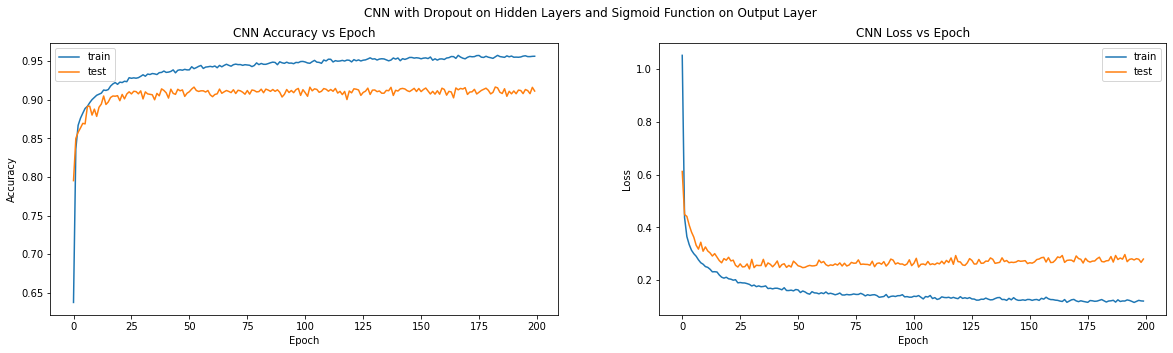

In [15]:
#Plot accuracy vs epoch
CNN_dropout_hidden_out_sig_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_out_sig_history.csv'
history=pd.read_csv(CNN_dropout_hidden_out_sig_file); 
plotting(history,'CNN with Dropout on Hidden Layers and Sigmoid Function on Output Layer')

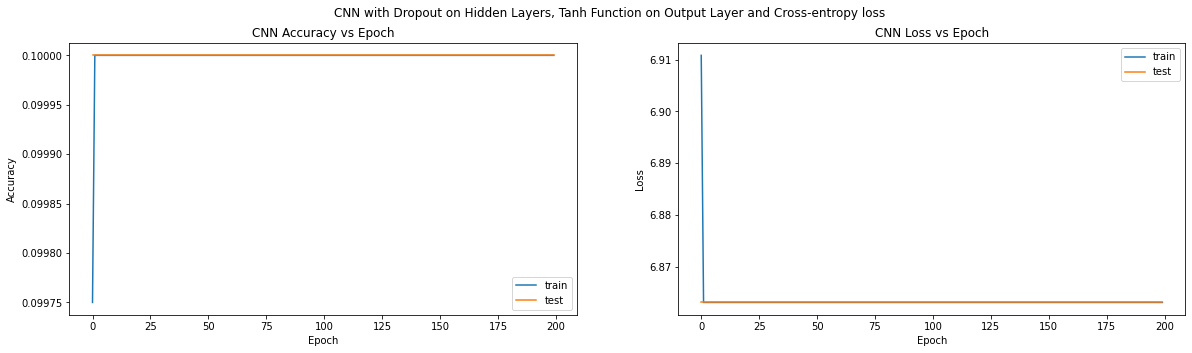

In [19]:
CNN_dropout_hidden_out_tanh_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_out_tanh_history.csv'
history=pd.read_csv(CNN_dropout_hidden_out_tanh_file); 
plotting(history,'CNN with Dropout on Hidden Layers, Tanh Function on Output Layer and Cross-entropy loss')

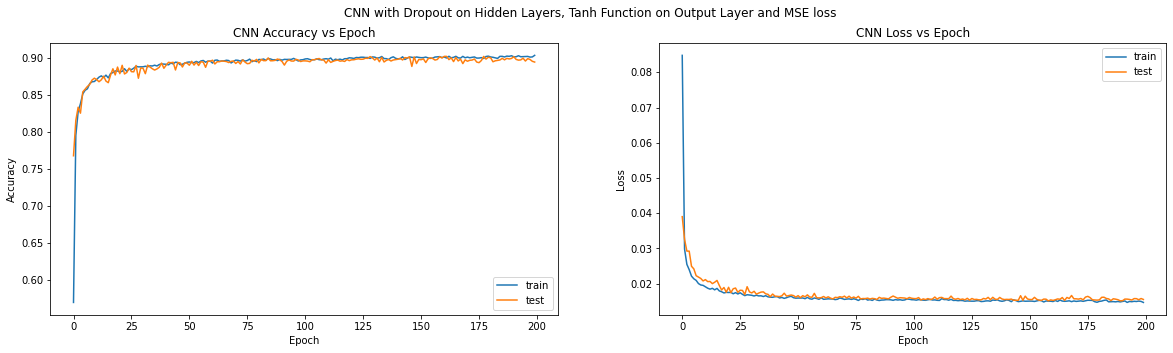

Training loss is  0.014633906073868275 ; Testing loss is  0.015481040813028812
Training loss is  0.903266668319702 ; Testing loss is  0.8942000269889832


In [23]:
CNN_dropout_hidden_out_tanh_mse_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_out_tanh_mse_history.csv'
history=pd.read_csv(CNN_dropout_hidden_out_tanh_mse_file); 
plotting(history,'CNN with Dropout on Hidden Layers, Tanh Function on Output Layer and MSE loss')
print('Training loss is ', history.loss[199],'; Testing loss is ', history.val_loss[199])
print('Training loss is ', history.accuracy[199],'; Testing loss is ', history.val_accuracy[199])

## Answers
Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: 

| Method | Training Loss | Testing Loss | Training Accuracy (%) | Testing Accuracy (%) | Accuracy Difference (%)
| :- | -: | -: | -: |  -: | :-: |
| Softmax                    | 0.27 | 0.42 | 89.7 | 83.5 | 6.5
| Sigmoid                    | 0.12 | 0.28 | 95.6 | 91.1 | 4.5
| Tanh with cross entropy    | 6.8  | 6.8  | 10.0 | 10.0 | 0.0
| Tanh with mse              | 0.14 | 0.05 | 90.3 | 89.4 | 0.9

Sigmoid provides the best dataset

  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: Cross entropy requires that the final values out of the ouput must all add be between 0 and 1 and all add up to 1. However, tanh does not ensure this property, which is why MSE performs better. And this is why, the optimiser is unable to minimise the loss because it is not calculated correctly. 

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: Cross entropy requires that the final values out of the ouput must all add be between 0 and 1 and all add up to 1. This is because cross entropy takes log of the values. However, tanh does not ensure this property, which is why MSE performs better. 
Citation: https://stats.stackexchange.com/questions/221901/can-the-cross-entropy-cost-function-be-used-with-tanh

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: The output of sigmoid is between 0 and 1, however, it fails to meet the criteria of adding up to 1. This is still better than tanh. Since all the values are raised to the exponent in both sigmoid and softmax, the addition of all values can be approximated as a single value. 


#Part 5: Bonus


## 5.3a Sigmoid hidden activation

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden_sig():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(Conv2D(256, kernel_size=(3,3),activation='sigmoid',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='sigmoid',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='sigmoid',kernel_initializer='normal'))
    model.add(Dense(100,activation='sigmoid',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='softmax'))      
    return model


#Create instance of CNN model graph
CNN_dropout_hidden_sig = CNN_dropout_hidden_sig()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden_sig.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_sig_mdata =  CNN_dropout_hidden_sig.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)
#CNN_dropout_in.save('saved_model/CNN_dropout_both') 
hist_df = pd.DataFrame(CNN_dropout_hidden_sig_mdata.history) 
CNN_dropout_hidden_sig_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_sig_history.csv'
with open(CNN_dropout_hidden_sig_file, mode='w') as f:
    hist_df.to_csv(f)
#Print accuracy of model on testing set after training 
scores_dropout_hidden_sig = CNN_dropout_hidden_sig.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_hidden_sig[1]*100))

Epoch 1/200
59/59 [==============================] - 17s 276ms/step - loss: 2.3258 - accuracy: 0.1001 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 2/200
59/59 [==============================] - 16s 272ms/step - loss: 2.3051 - accuracy: 0.1014 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 3/200
59/59 [==============================] - 16s 272ms/step - loss: 2.3046 - accuracy: 0.0988 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 4/200
59/59 [==============================] - 16s 271ms/step - loss: 2.3034 - accuracy: 0.0983 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 5/200
59/59 [==============================] - 16s 272ms/step - loss: 2.3032 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/200
59/59 [==============================] - 16s 272ms/step - loss: 2.3031 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/200
59/59 [==============================] - 16s 272ms/step - loss: 2.3029 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy:

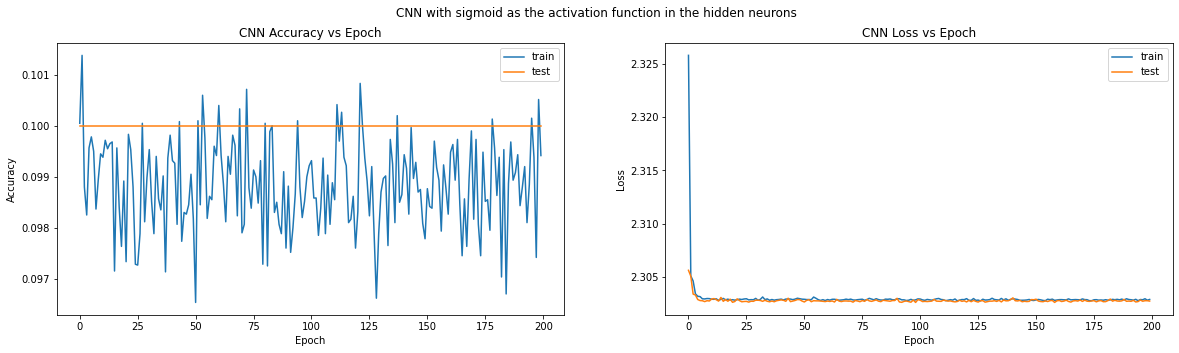

In [4]:
#Plot accuracy vs epoch
CNN_dropout_hidden_sig_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_sig_history.csv'
history=pd.read_csv(CNN_dropout_hidden_sig_file); 
plotting(history,'CNN with sigmoid as the activation function in the hidden neurons')

##5.3b Tanh hidden activation


In [27]:
#Create and train model architecture
def CNN_dropout_hidden_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(Conv2D(256, kernel_size=(3,3),activation='tanh',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='tanh',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3))
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='tanh',kernel_initializer='normal'))
    model.add(Dense(100,activation='tanh',kernel_initializer='normal'))
    model.add(Dense(num_classes,activation='softmax'))      
    return model


#Create instance of CNN model graph
CNN_dropout_hidden_tanh = CNN_dropout_hidden_tanh()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden_tanh.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_tanh_mdata =  CNN_dropout_hidden_tanh.fit(data_train, labels_train, epochs=200,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True)
#CNN_dropout_in.save('saved_model/CNN_dropout_both') 
hist_df = pd.DataFrame(CNN_dropout_hidden_tanh_mdata.history) 
CNN_dropout_hidden_tanh_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_tanh_history.csv'
with open(CNN_dropout_hidden_tanh_file, mode='w') as f:
    hist_df.to_csv(f)


Epoch 1/200
59/59 [==============================] - 17s 278ms/step - loss: 1.0999 - accuracy: 0.5987 - val_loss: 1.9889 - val_accuracy: 0.4653
Epoch 2/200
59/59 [==============================] - 16s 274ms/step - loss: 0.7009 - accuracy: 0.7284 - val_loss: 1.7643 - val_accuracy: 0.4951
Epoch 3/200
59/59 [==============================] - 16s 275ms/step - loss: 0.6631 - accuracy: 0.7471 - val_loss: 1.7577 - val_accuracy: 0.4990
Epoch 4/200
59/59 [==============================] - 16s 274ms/step - loss: 0.6335 - accuracy: 0.7570 - val_loss: 1.9165 - val_accuracy: 0.4748
Epoch 5/200
59/59 [==============================] - 16s 274ms/step - loss: 0.5983 - accuracy: 0.7674 - val_loss: 1.3912 - val_accuracy: 0.6023
Epoch 6/200
59/59 [==============================] - 16s 274ms/step - loss: 0.5894 - accuracy: 0.7751 - val_loss: 1.2344 - val_accuracy: 0.6162
Epoch 7/200
59/59 [==============================] - 16s 274ms/step - loss: 0.5764 - accuracy: 0.7794 - val_loss: 1.3493 - val_accuracy:

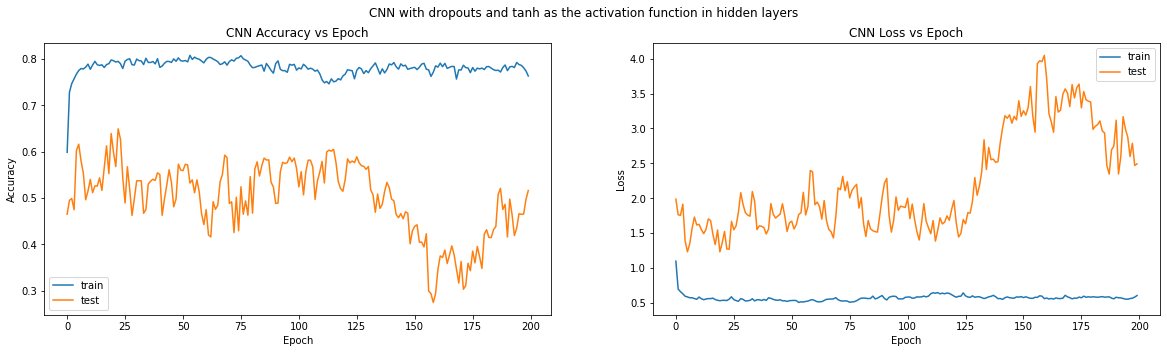

In [31]:
#Print accuracy of model on testing set after training 
scores_dropout_hidden_tanh = CNN_dropout_hidden_tanh.evaluate(data_train, labels_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_dropout_hidden_tanh[1]*100))

#Plot accuracy vs epoch
CNN_dropout_hidden_tanh_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_dropout_hidden_tanh_history.csv'
history=pd.read_csv(CNN_dropout_hidden_tanh_file); 
plotting(history,'CNN with dropouts and tanh as the activation function in hidden layers')

## 5.3b Active neurons activation


In [233]:
from tensorflow.keras import  callbacks

#Create and train model architecture
def CNN_active_neurons():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    model.add(InputLayer(input_shape=(n,n,num_channels)))
    model.add(Dropout(.3)) 
    model.add(Conv2D(256, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3)) 
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, data_format=None))
    model.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=(n,n,num_channels)))
    model.add(Dropout(.3)) 
    model.add(MaxPooling2D(pool_size=(2,2), strides=None, data_format=None))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='normal'))
    model.add(Dense(10,activation='softmax'))      
    return model
tf.random.set_seed(42)
neuron_weights0=[]; neuron_weights1=[]; neuron_weights2=[]; neuron_weights3=[]; neuron_weights4=[]; neuron_weights5=[]; neuron_weights6=[]; neuron_weights7=[]; neuron_weights8=[]; neuron_weights9=[]; neuron_weights10=[];
class CustomCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      neuron_weights0.append(CNN_active_neurons.layers[0].get_weights())
      neuron_weights1.append(CNN_active_neurons.layers[1].get_weights())
      neuron_weights2.append(CNN_active_neurons.layers[2].get_weights())
      neuron_weights3.append(CNN_active_neurons.layers[3].get_weights())
      neuron_weights4.append(CNN_active_neurons.layers[4].get_weights())
      neuron_weights5.append(CNN_active_neurons.layers[5].get_weights())
      neuron_weights6.append(CNN_active_neurons.layers[6].get_weights())
      neuron_weights7.append(CNN_active_neurons.layers[7].get_weights())
      neuron_weights8.append(CNN_active_neurons.layers[8].get_weights())
      neuron_weights9.append(CNN_active_neurons.layers[9].get_weights())
      neuron_weights10.append(CNN_active_neurons.layers[10].get_weights())
      # neuron_weights1.append(CNN_active_neurons.trainable_variables)

#Create instance of CNN model graph
CNN_active_neurons = CNN_active_neurons()

#Compile model using an appropriate loss and optimizer algorithm
CNN_active_neurons.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_active_neurons_mdata =  CNN_active_neurons.fit(data_train, labels_train, epochs=100,
                        validation_data=(data_test, labels_test),
                        batch_size=1024,
                        shuffle=True,
                        callbacks=[CustomCallback()])


#CNN_dropout_in.save('saved_model/CNN_dropout_both') 
hist_df = pd.DataFrame(CNN_active_neurons_mdata.history) 
CNN_active_neurons_file = '/content/drive/MyDrive/ECE595DL/Project1/CNN_active_neurons_history.csv'
with open(CNN_active_neurons_file, mode='w') as f:
    hist_df.to_csv(f)

#Print accuracy of model on testing set after training 
scores_active_neurons_file = CNN_active_neurons.evaluate(data_train, labels_train,callbacks=[CustomCallback()])

# #Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_active_neurons_file[1]*100))

Epoch 1/100
59/59 [==============================] - 17s 276ms/step - loss: 1.1804 - accuracy: 0.5976 - val_loss: 0.7283 - val_accuracy: 0.7731
Epoch 2/100
59/59 [==============================] - 16s 271ms/step - loss: 0.5252 - accuracy: 0.7985 - val_loss: 0.6018 - val_accuracy: 0.8179
Epoch 3/100
59/59 [==============================] - 16s 271ms/step - loss: 0.4578 - accuracy: 0.8248 - val_loss: 0.5607 - val_accuracy: 0.8181
Epoch 4/100
59/59 [==============================] - 16s 272ms/step - loss: 0.4281 - accuracy: 0.8389 - val_loss: 0.5418 - val_accuracy: 0.8273
Epoch 5/100
59/59 [==============================] - 16s 271ms/step - loss: 0.4127 - accuracy: 0.8440 - val_loss: 0.5098 - val_accuracy: 0.8372
Epoch 6/100
59/59 [==============================] - 16s 271ms/step - loss: 0.4039 - accuracy: 0.8457 - val_loss: 0.4987 - val_accuracy: 0.8236
Epoch 7/100
59/59 [==============================] - 16s 271ms/step - loss: 0.3904 - accuracy: 0.8504 - val_loss: 0.4696 - val_accuracy:

1875/1875 [==============================] - 12s 7ms/step - loss: 0.4477 - accuracy: 0.8167


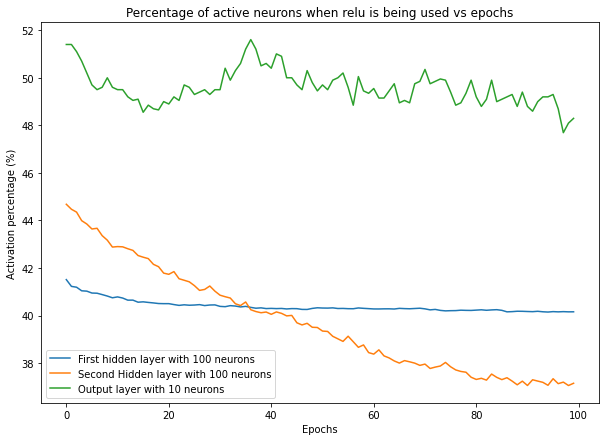

In [315]:
n8=[]; n9=[]; n10=[]; 
for i in range(100):
  n8.append(np.sum(neuron_weights8[i][0]>0)/np.sum(neuron_weights8[i][0]>-1)*100)
  n9.append(np.sum(neuron_weights9[i][0]>0)/np.sum(neuron_weights9[i][0]>-1)*100)
  n10.append(np.sum(neuron_weights10[i][0]>0)/np.sum(neuron_weights10[i][0]>-1)*100)

plt.figure(figsize=(10,7))
plt.plot(n8,label='First hidden layer with 100 neurons')
plt.plot(n9,label='Second Hidden layer with 100 neurons')
plt.plot(n10,label='Output layer with 10 neurons')
plt.legend()
plt.xlabel('Epochs'); plt.ylabel('Activation percentage (%)')
plt.title('Percentage of active neurons when relu is being used vs epochs')
plt.show()

## Bonus Question answers
a) Change hidden units to sigmoid and tanh and report the accuracy and loss plots for the training and testing sets

  Ans: Please see the plots above

b) When using Relu hidden layer activations, compare average activity in layers during training and testing

Ans: The activation units seems to be similar for both during training and testing. However, the actual value depends on the optimisation algorithm. Since only approximately 50% of the neurons are active in every layer, this helps increase the computational speed as well as adding non-linearity. The model can learn these smaller number of parameters really well during each epoch

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
# !wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
# !tar -xvjf RML2016.10b.tar.bz2

# #Extract high SNR data and obtain their corresponding lables 
# Xd = pickle.load(open("RML2016.10b.dat",'rb'),encoding='latin1')
!wget --no-check-certificate https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919121515_2592ca3f404139117b51d53e_b610aa04a99f0d7afe1cb13ea3163d31e8501f59_002_20210919131515_0027_dnld
!mv RML2016.10b.tar.bz2?Authorization=3_20210919121515_2592ca3f404139117b51d53e_b610aa04a99f0d7afe1cb13ea3163d31e8501f59_002_20210919131515_0027_dnld RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2


--2021-09-19 12:47:30--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919121515_2592ca3f404139117b51d53e_b610aa04a99f0d7afe1cb13ea3163d31e8501f59_002_20210919131515_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2?Authorization=3_20210919121515_2592ca3f404139117b51d53e_b610aa04a99f0d7afe1cb13ea3163d31e8501f59_002_20210919131515_0027_dnld’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  19.1MB/s    in 63s     

2021-09-19 12:48:35 (18.7 MB/s) - ‘RML2016.10b.tar.bz2?Authorization=3_20210919121515_2592ca3f404139117b51d53e_b610aa04a99f0d7afe1cb13ea3163d31e8501f59_002_20210919131515_0027_dnld’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [ ]:
import pickle 
# Xd = pickle.load(open("/content/drive/MyDrive/ECE595DL/Project1/RML2016.10b.dat",'rb'), encoding='latin1')
# Xd = pickle.load(open("RML2016.10b.dat",'rb'), encoding='latin1')
Xd = pickle.load(open("RML2016.10b.dat",'rb'), encoding='latin1')

snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy=list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

In [ ]:
n1=2; n2=128; n3=1;
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    model.add(InputLayer(input_shape=(2,128,1)))
    model.add(Conv2D(256, kernel_size=(1,3),activation='relu',input_shape=(n1,n2,n3)))
    model.add(Dropout(.2))
    model.add(Conv2D(256, kernel_size=(2,3),activation='relu',input_shape=(n1,n2,n3)))
    model.add(Conv2D(80 , kernel_size=(1,3),activation='relu',input_shape=(n1,n2,n3)))
    model.add(Dropout(.2))
    model.add(Conv2D(80 , kernel_size=(1,3),activation='relu',input_shape=(n1,n2,n3)))

    model.add(Reshape((120,80)))
    model.add(tf.keras.layers.LSTM(50))
    model.add(Dense(128,activation='relu',kernel_initializer='normal'))
    model.add(Dense(10,activation='softmax'))        
    return model

#Create instance of CNN model graph
cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
cldnn.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cldnn_mdata =  cldnn.fit(X_train, Y_train, epochs=100,
                        validation_data=(X_test, Y_test),
                        batch_size=2048,
                        shuffle=True)


Epoch 1/100
211/211 [==============================] - 200s 764ms/step - loss: 2.0398 - accuracy: 0.1897 - val_loss: 1.4520 - val_accuracy: 0.3977
Epoch 2/100
211/211 [==============================] - 154s 729ms/step - loss: 0.9899 - accuracy: 0.5288 - val_loss: 0.6094 - val_accuracy: 0.7138
Epoch 3/100
211/211 [==============================] - 153s 727ms/step - loss: 1.8129 - accuracy: 0.2757 - val_loss: 1.7380 - val_accuracy: 0.2976
Epoch 4/100
211/211 [==============================] - 154s 729ms/step - loss: 1.3422 - accuracy: 0.4051 - val_loss: 0.7985 - val_accuracy: 0.6259
Epoch 5/100
211/211 [==============================] - 154s 730ms/step - loss: 0.6243 - accuracy: 0.6862 - val_loss: 0.4963 - val_accuracy: 0.7497
Epoch 6/100
211/211 [==============================] - 154s 730ms/step - loss: 0.4745 - accuracy: 0.7575 - val_loss: 0.4307 - val_accuracy: 0.7836
Epoch 7/100
211/211 [==============================] - 154s 730ms/step - loss: 0.4175 - accuracy: 0.7919 - val_loss: 0

FileNotFoundError: ignored

In [ ]:
#Print accuracy of model on testing set after training 
hist_df = pd.DataFrame(cldnn_mdata.history) 
cldnn_file = '/content/drive/MyDrive/ECE595DL/Project1/cldnn_history.csv'
with open(cldnn_file, mode='w') as f:
    hist_df.to_csv(f)
scores_cldnn = cldnn.evaluate(X_train, Y_train)

#Print accuracy of model on testing set after training 
print("Accuracy: %.2f%%" %(scores_cldnn[1]*100))


13500/13500 [==============================] - 160s 12ms/step - loss: 0.2167 - accuracy: 0.8999
Accuracy: 89.99%


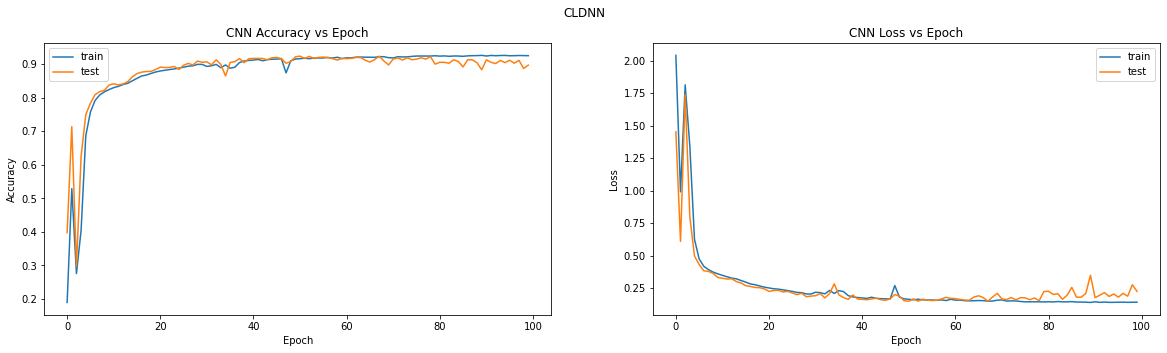

In [28]:
#Plot accuracy vs epoch
cldnn_file = '/content/drive/MyDrive/ECE595DL/Project1/cldnn_history.csv'
history = pd.read_csv(cldnn_file); 
plotting(history,'CLDNN')

## Answers
Answer the following questions: 

1.   Is this model a good fit for the data?  

  ANS: 

| Training Loss | Testing Loss | Training Accuracy (%) | Testing Accuracy (%) | Accuracy Difference (%)
| -: | -: | -: |  -: | :-: |
| 0.14 | 0.22 | 92.5 | 89.7 | 2.8

The training and testing loss seem to be low and follow the trend on the curve shown above. The accuracy is also close to 90% and the difference between the training and testing accuracy is 2.8%, which means that it is not overfitting. 

2.   Give two ways to improve the robustness of the model.

  ANS: 

  1. Regularisation could be added to the model
  2. Adaptive learning rate could be used for the optimiser, also different optimisers could be tested for. Right now, 0.01 value was used for learning rate but this can be decreased to 0.01 and the number of epochs can be increased.